In [1]:
# Dimitrios Bakalis

import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import pandas as pd 
from numpy import *
import numpy as np
import operator
import sklearn
import random 
import time
import math
import json 
import nltk

In [2]:
import tensorflow as tf

from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential

import keras

from tensorflow.keras import utils as np_utils
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv('mitbih_train.csv', header = None)
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_test = pd.read_csv('mitbih_test.csv', header = None)
df_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = pd.concat([df_train, df_test], axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


In [7]:
df.rename(columns={187: 'class'}, inplace=True)

In [8]:
id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
df['label'] = df.iloc[:, -1].map(id_to_label)

In [9]:
df['label'].value_counts()

Normal                               90589
Fusion of paced and normal            8039
Premature ventricular contraction     7236
Artial Premature                      2779
Fusion of ventricular and normal       803
Name: label, dtype: int64

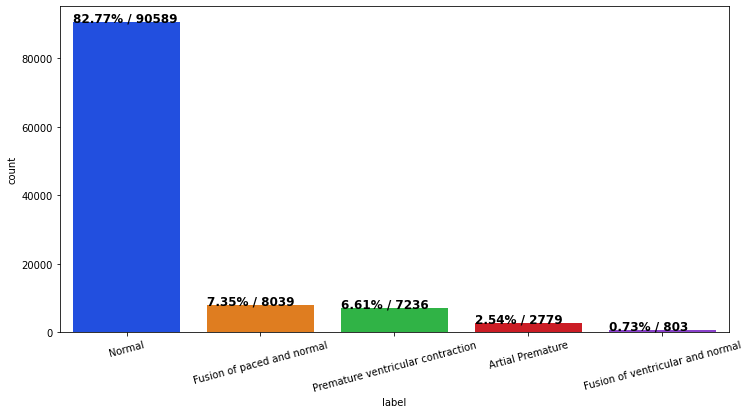

In [10]:
percentages = [count / df.shape[0] * 100 for count in df['label'].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=df['label'],
    ax=ax,
    palette="bright",
    order=df['label'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    df['label'].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')

#plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
#        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [11]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,class,label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [12]:
ecg_list = df.values.tolist()        # list that holds the values of the compounds from our dataframe

i=-1
for ecg in ecg_list:
    i+=1
    ecg_list[i]=ecg[:187]

ecg_array = np.array(ecg_list)             # we transform our compound list into an array
ecg_array = np.nan_to_num(ecg_array)       # we replace the Nan values with zeros

print("ECG array dimensions ", ecg_array.shape)

ECG array dimensions  (109446, 187)


In [13]:
labels = df['class']
labels = to_categorical(labels)           # One-Hot Encoding for 5 classes
print(labels,'\n',labels.shape)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] 
 (109446, 5)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(ecg_array, labels, test_size=0.3, random_state=44)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()			                                                                
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  						 # 1st fully connected hidden Layer with 128 nodes 	     
model.add(Dense(64, activation='relu'))  						                             # 2nd fully connected hidden Layer with 64 nodes
model.add(Dense(32, activation='relu'))  						                             # 3d fully connected hidden Layer with 32 nodes 	                            
model.add(Dense(y_train.shape[1], activation='softmax'))           	                         # Output Layer (with softmax activation function for Multi-Label Classification)

model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               24064     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 34,565
Trainable params: 34,565
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
r = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=64, verbose=1) 

Epoch 1/50
958/958 [==============================] - 2s 1ms/step - loss: 0.2095 - accuracy: 0.9423 - val_loss: 0.1400 - val_accuracy: 0.9598
Epoch 2/50
958/958 [==============================] - 1s 1ms/step - loss: 0.1214 - accuracy: 0.9656 - val_loss: 0.1178 - val_accuracy: 0.9693
Epoch 3/50
958/958 [==============================] - 1s 1ms/step - loss: 0.1019 - accuracy: 0.9706 - val_loss: 0.1215 - val_accuracy: 0.9657
Epoch 4/50
958/958 [==============================] - 1s 1ms/step - loss: 0.0887 - accuracy: 0.9745 - val_loss: 0.1083 - val_accuracy: 0.9693
Epoch 5/50
958/958 [==============================] - 1s 1ms/step - loss: 0.0813 - accuracy: 0.9762 - val_loss: 0.1012 - val_accuracy: 0.9712
Epoch 6/50
958/958 [==============================] - 1s 1ms/step - loss: 0.0753 - accuracy: 0.9780 - val_loss: 0.0906 - val_accuracy: 0.9753
Epoch 7/50
958/958 [==============================] - 1s 1ms/step - loss: 0.0692 - accuracy: 0.9788 - val_loss: 0.0947 - val_accuracy: 0.9736
Epoch 

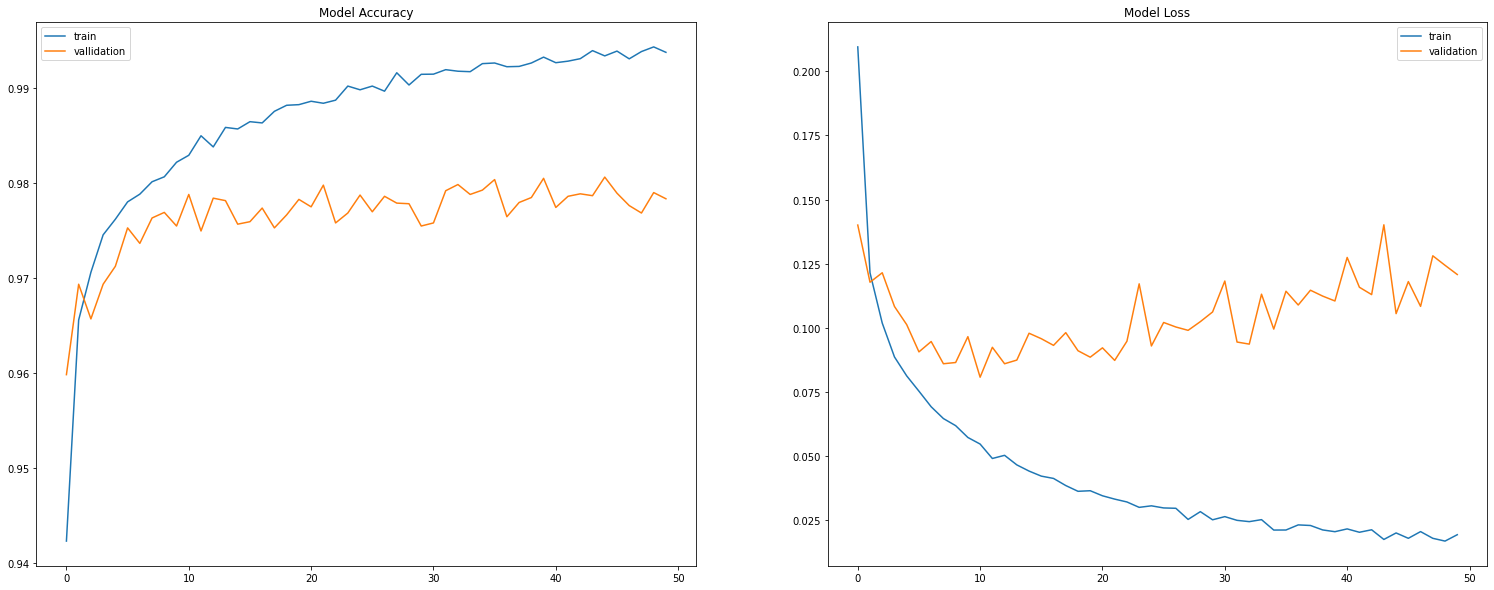

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(26, 10)

ax1.set_title('Model Accuracy')
ax1.plot(r.history['accuracy'], label='train')
ax1.plot(r.history['val_accuracy'], label='vallidation')
ax1.legend()

ax2.set_title('Model Loss')
ax2.plot(r.history['loss'], label='train')
ax2.plot(r.history['val_loss'], label='validation')
ax2.legend()

In [19]:
y_pred=model.predict(X_test)

Normalized confusion matrix
Confusion matrix, without normalization


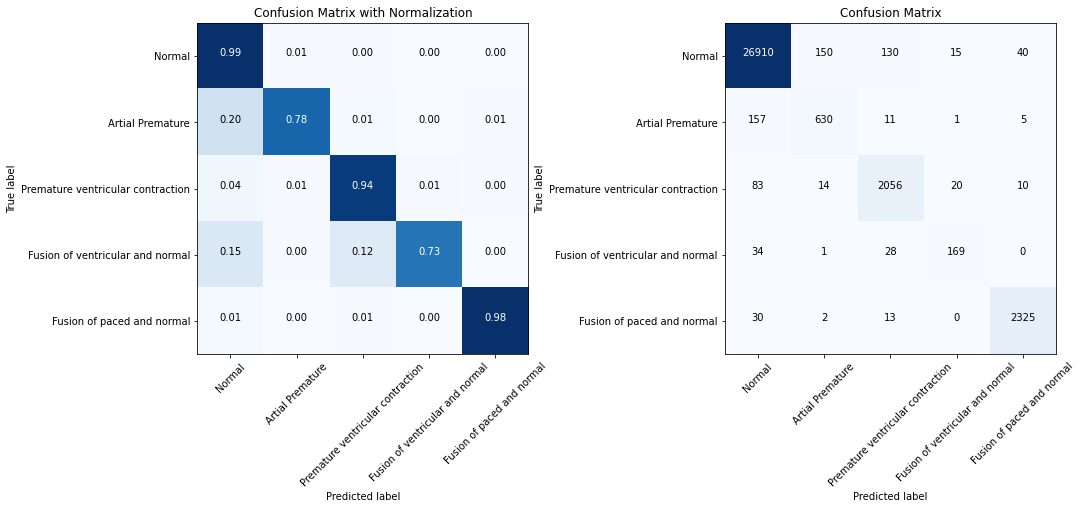

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(10, 10))

fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.35, wspace=0.1)


ax = fig.add_subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal'], normalize=True,
                      title='Confusion Matrix with Normalization')

ax = fig.add_subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal'],
                      title='Confusion Matrix')

plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(ecg_array, labels, test_size=0.3, random_state=44)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))  # Transforming each ECG Signal for traning, from 1D to 2D for feeding them in our custom CNN
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))      # Transforming each ECG Signal for training, from 1D to 2D for feeding them in our custom CNN

print(X_train.shape,X_test.shape)

print(y_train.shape,y_test.shape)


(76612, 187, 1) (32834, 187, 1)
(76612, 5) (32834, 5)


In [128]:
model = Sequential()	
model.add(Conv1D(32, kernel_size =3, activation='relu', input_shape=(X_train.shape[1],1)))   # 1st Convolutional Layer with a ECG Signal input of shape (187,1)    ---- filters=64, kernel_size=3, padding = 'same'
model.add(MaxPooling1D(pool_size=3))                                                         # Pooling Layer with pool size of 3 to 'downsample' our signal
model.add(Conv1D(64, kernel_size =3, activation='relu'))                                     # 2nd Convolutional Layer 
model.add(MaxPooling1D(pool_size=3))                                                         # Pooling Layer with pool size of 3 to 'downsample' our signal
model.add(Conv1D(128, kernel_size =3, activation='relu'))	                                 # 3d Convolutional Layer 
model.add(MaxPooling1D(pool_size=3))	                                                     # Pooling Layer with pool size of 3 to 'downsample' our signal
model.add(Dropout(0.2))					                                                     # Dropout method to deactivate 20% of the neurons in each epoch
model.add(GlobalMaxPooling1D())                                                              # Applying the GlobalMaxPooling method to the model
model.add(Flatten())		                                                                 # Flatten Layer reducing the dimension of the ECG Signal from 2D to 1
model.add(Dense(256, activation='relu'))  						                             # 1st fully connected hidden Layer with 256 nodes 	                            
model.add(Dense(y_train.shape[1], activation='softmax'))           	                         # Output Layer (with softmax activation function for Multi-Label Classification)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

print(model.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_72 (Conv1D)          (None, 185, 32)           128       
                                                                 
 max_pooling1d_44 (MaxPoolin  (None, 61, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_73 (Conv1D)          (None, 59, 64)            6208      
                                                                 
 max_pooling1d_45 (MaxPoolin  (None, 19, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_74 (Conv1D)          (None, 17, 128)           24704     
                                                                 
 max_pooling1d_46 (MaxPoolin  (None, 5, 128)         

In [129]:
r = model.fit(X_train, y_train, epochs=25, validation_split=0.2, batch_size=10, verbose=1) 

Epoch 1/25
6129/6129 [==============================] - 24s 4ms/step - loss: 0.2260 - accuracy: 0.9375 - val_loss: 0.1469 - val_accuracy: 0.9648
Epoch 2/25
6129/6129 [==============================] - 23s 4ms/step - loss: 0.1335 - accuracy: 0.9641 - val_loss: 0.1290 - val_accuracy: 0.9651
Epoch 3/25
6129/6129 [==============================] - 24s 4ms/step - loss: 0.1121 - accuracy: 0.9694 - val_loss: 0.0936 - val_accuracy: 0.9748
Epoch 4/25
6129/6129 [==============================] - 23s 4ms/step - loss: 0.0993 - accuracy: 0.9723 - val_loss: 0.0849 - val_accuracy: 0.9781
Epoch 5/25
6129/6129 [==============================] - 23s 4ms/step - loss: 0.0908 - accuracy: 0.9753 - val_loss: 0.0939 - val_accuracy: 0.9753
Epoch 6/25
6129/6129 [==============================] - 23s 4ms/step - loss: 0.0844 - accuracy: 0.9763 - val_loss: 0.0749 - val_accuracy: 0.9794
Epoch 7/25
6129/6129 [==============================] - 23s 4ms/step - loss: 0.0797 - accuracy: 0.9777 - val_loss: 0.0772 - val_ac

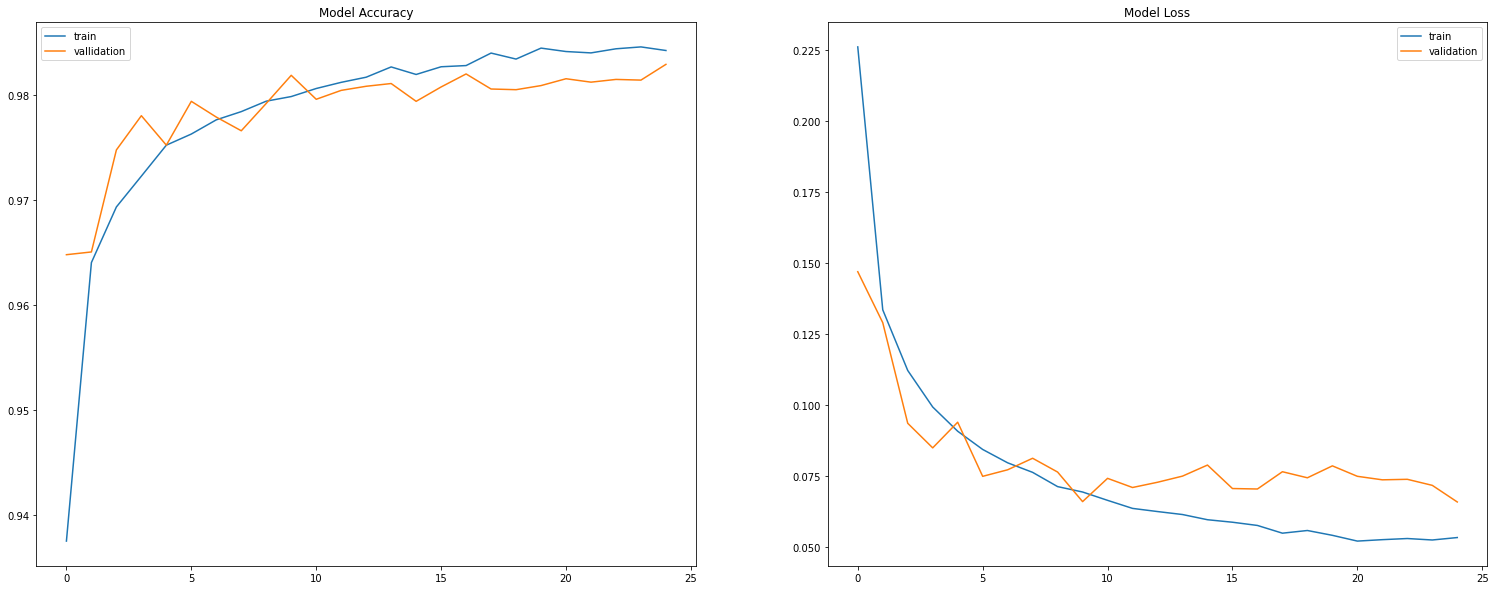

In [130]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(26, 10)

ax1.set_title('Model Accuracy')
ax1.plot(r.history['accuracy'], label='train')
ax1.plot(r.history['val_accuracy'], label='vallidation')
ax1.legend()

ax2.set_title('Model Loss')
ax2.plot(r.history['loss'], label='train')
ax2.plot(r.history['val_loss'], label='validation')
ax2.legend()

In [132]:
y_pred=model.predict(X_test)

Normalized confusion matrix
Confusion matrix, without normalization


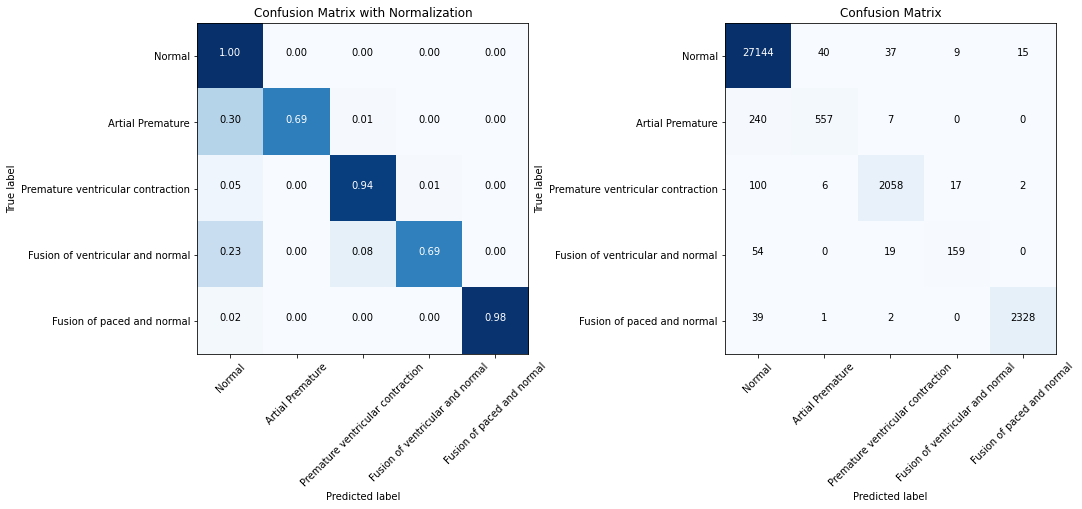

In [133]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(10, 10))

fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.35, wspace=0.1)


ax = fig.add_subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal'], normalize=True,
                      title='Confusion Matrix with Normalization')

ax = fig.add_subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal'],
                      title='Confusion Matrix')

plt.show()